In [68]:
import pandas as pd
from pathlib import Path
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler, SMOTE

from collections import Counter
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from collections import Counter
from sklearn.metrics import confusion_matrix

from operator import itemgetter
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, RFE
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report

In [69]:
# file_name = 'merged_data.csv'
file_name = '0_61938.csv'
data_dir = 'ohlc_data'
data_path = os.path.join(os.getcwd(), data_dir, file_name)

data = pd.read_csv(data_path, index_col=0)
data.reset_index(drop=True, inplace=True)
features_df = feature_generate(data)
features_df_nonan = features_df.dropna().reset_index().drop(columns=['index'])

In [70]:
selected_features_, feat_idx_ = features_selection(features_df_nonan)

Features removed due to high correlation: ['EMA_5', 'EMA_10', 'EMA_20', 'Williams_%R', 'Bollinger_Mid', 'Keltner_Mid', 'Tenkan_Sen', 'Fib_0', 'Fib_61.8', 'Fib_38.2', 'Channel_High', 'Channel_Low', 'Channel_Mid', 'Std_Dev_Upper', 'Std_Dev_Lower', 'HA_Close', 'HA_Open', 'Pivot_Point', 'Pivot_R1', 'Pivot_S1']


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.06740962764968117, tolerance: 0.06329994938349116
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.20553003039583473, tolerance: 0.06329994938349116
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.3779749126836123, tolerance: 0.06329994938349116
  model = cd_fast.enet_coordinate_d

C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.10713094025470582, tolerance: 0.06509999797533961
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.897348948088279, tolerance: 0.06509999797533961
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.8366868863138279, tolerance: 0.06509999797533961
  model = cd_fast.enet_coordinate_des

C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7558505141598744, tolerance: 0.06299999190152243
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.9161918097150874, tolerance: 0.06299999190152243
  model = cd_fast.enet_coordinate_descent_gram(
C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0183203158295555, tolerance: 0.06299999190152243
  model = cd_fast.enet_coordinate_des

Features selected by Lasso: ['Open', 'High', 'Low', 'Volume', 'SMA_5', 'SMA_10', 'SMA_20', 'SMA_50', 'SMA_100', 'EMA_200', 'RSI_14', 'Stochastic_K', 'Stochastic_D', 'MACD', 'MACD_Hist', 'ATR', 'Plus_DI', 'Minus_DI', 'ADX', 'CCI', 'Bollinger_Upper', 'Bollinger_Lower', 'ROC', 'OBV', 'Force_Index', 'ADL', 'MFI', 'ASI', 'Chaikin_Oscillator', 'RS', 'Donchian_Upper', 'Donchian_Lower', 'Kijun_Sen', 'Senkou_Span_A', 'Senkou_Span_B', 'Fib_100', 'Fib_50', 'Double_Top', 'Double_Bottom', 'LR_Center', 'LR_Upper', 'SAR', 'VWAP_Upper', 'VWAP_Lower', 'Adaptive_Upper', 'Adaptive_Lower']
Feature indices for common features: [0, 1, 2, 4, 5, 6, 7, 8, 10, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 51, 52, 53, 54]


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.497e+02, tolerance: 7.930e-02
  model = cd_fast.enet_coordinate_descent(


In [71]:
model_name = os.path.join(os.getcwd(), data_dir)
xTest, yTest_onehot, history_, model_path = prepare_train_model(features_df_nonan.iloc[:, feat_idx_], model_name)



train_split = 0.8
Shape of x, y train/cv/test: (117016, 43) (117016,) (29255, 43) (29255,) (12348, 43) (12348,)
Epoch 1/10
3657/3657 [==============================] - 15s 4ms/step - loss: 0.4340 - accuracy: 0.8189 - val_loss: 0.7280 - val_accuracy: 0.6830
Epoch 2/10
3657/3657 [==============================] - 14s 4ms/step - loss: 0.3322 - accuracy: 0.8689 - val_loss: 1.0154 - val_accuracy: 0.6151
Epoch 3/10
3657/3657 [==============================] - 15s 4ms/step - loss: 0.3027 - accuracy: 0.8826 - val_loss: 0.6763 - val_accuracy: 0.7294
Epoch 4/10
3657/3657 [==============================] - 15s 4ms/step - loss: 0.2838 - accuracy: 0.8923 - val_loss: 0.9807 - val_accuracy: 0.6589
Epoch 5/10
3657/3657 [==============================] - 16s 4ms/step - loss: 0.2678 - accuracy: 0.8982 - val_loss: 1.4884 - val_accuracy: 0.6128
Epoch 6/10
3657/3657 [==============================] - 15s 4ms/step - loss: 0.2581 - accuracy: 0.9034 - val_loss: 1.9227 - val_accuracy: 0.6081
Epoch 7/10
3657/36

INFO:tensorflow:Assets written to: D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\assets


386/386 [==============================] - 1s 1ms/step
Predicted: [0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[10224   999   966]
 [   25    54     0]
 [   28     0    52]]
              precision    recall  f1-score   support

           0       0.99      0.84      0.91     12189
           1       0.05      0.68      0.10        79
           2       0.05      0.65      0.09        80

    accuracy                           0.84     12348
   macro avg       0.37      0.72      0.37     12348
weighted avg       0.98      0.84      0.90     12348



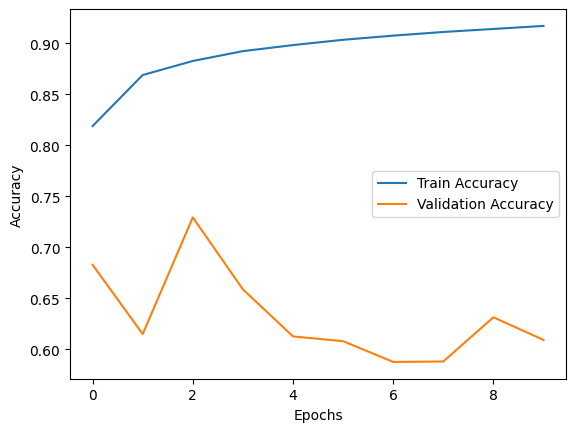

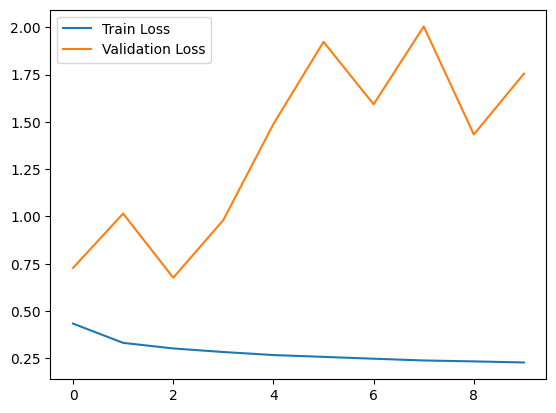

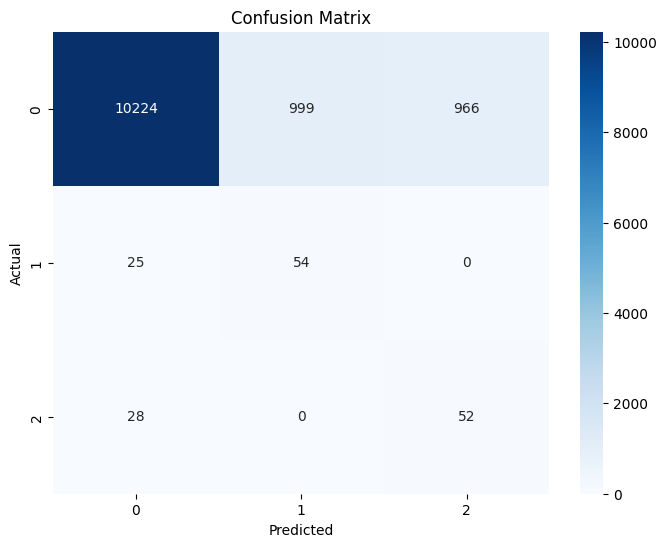

In [72]:
predictions_accuracy_plot(xTest, yTest_onehot, history_, model_path)  

In [45]:
def features_selection(df, selection_method='all', topk=10, num_features=225):
    
    # Check if the columns exist before dropping
    columns_to_drop = ['Time', 'Date', 'Signal']
    X = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
    
    # Separate features and target variable
    y = df['Signal']  # Target variable
    
    # Ensure that only numeric columns are used for correlation
    X_numeric = X.select_dtypes(include=[np.number])

    # Step 1: Correlation Matrix
    # Remove highly correlated features
    cor_matrix = X_numeric.corr().abs()
    upper_triangle = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    high_corr_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.9999)]
    X.drop(columns=high_corr_features, inplace=True)
    print(f"Features removed due to high correlation: {high_corr_features}")

    # Step 2: Feature Selection with Lasso
    # Scale the data before Lasso
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply LassoCV for feature selection
    lasso = LassoCV(cv=5, random_state=0).fit(X_scaled, y)
    lasso_selected_features = X.columns[lasso.coef_ != 0]
    print(f"Features selected by Lasso: {list(lasso_selected_features)}")

#     # Step 3: Recursive Feature Elimination (RFE) with Random Forest
#     rfe_selector = RFE(estimator=RandomForestClassifier(), n_features_to_select=10, step=1)
#     rfe_selector = rfe_selector.fit(X, y)
#     rfe_selected_features = X.columns[rfe_selector.support_]
#     print(f"Features selected by RFE: {list(rfe_selected_features)}")

#     # Step 4: Feature Importance using Random Forest
#     rf = RandomForestClassifier(random_state=0)
#     rf.fit(X, y)

    # Combine Lasso and RFE selected features
#     selected_features = list(set(lasso_selected_features) | set(rfe_selected_features))
#     print(f"Final selected features from Lasso and RFE: {selected_features}")

    list_features = X.columns.tolist()  # List of all feature names

#     # Additional feature selection based on ANOVA and Mutual Information
#     if selection_method == 'anova' or selection_method == 'all':
#         select_k_best_anova = SelectKBest(f_classif, k=topk)
#         select_k_best_anova.fit(X, y)
#         selected_features_anova = itemgetter(*select_k_best_anova.get_support(indices=True))(list_features)
#         print("Selected features by ANOVA:", selected_features_anova)

#     if selection_method == 'mutual_info' or selection_method == 'all':
#         select_k_best_mic = SelectKBest(mutual_info_classif, k=topk)
#         select_k_best_mic.fit(X, y)
#         selected_features_mic = itemgetter(*select_k_best_mic.get_support(indices=True))(list_features)
#         print("Selected features by Mutual Information:", selected_features_mic)

    # Find common features if selection_method is 'all'
#     if selection_method == 'all':
#         common = list(set(selected_features_anova).intersection(selected_features_mic))
#         print("Common selected features:", len(common), common)
        
#         # Check if enough common features are found
#         if len(common) < num_features:
#             raise Exception(f'Number of common features found ({len(common)}) < {num_features} required features. Increase "topk" variable.')

    # Get indices of common features
    feat_idx = sorted([list_features.index(c) for c in lasso_selected_features][:num_features])
    print("Feature indices for common features:", feat_idx)

    return lasso_selected_features, feat_idx

In [58]:
model_dir = 'models'
fold = True

dataset_feature_engineered = features_df_nonan.iloc[:, feat_idx_]
dataset_feature_engineered_no = features_df_nonan


if fold is True:
    model_dir_name = os.path.join(os.getcwd(), data_dir, model_dir)
    accuracies, histories = prepare_train_model_with_kfold(dataset_feature_engineered, model_dir_name)
# #         predictions_accuracy_plot(xTest, yTest_onehot, history_, model_path)
    print('Accuracy: ', accuracies)
# else:
#     model_name = os.path.join(os.getcwd(), data_dir, i)
#     xTest, yTest_onehot, history_, model_path = prepare_train_model(features_df_nonan, 
#                                                                     model_name)
#     predictions_accuracy_plot(xTest, yTest_onehot, history_, model_path)        
        
        

Fold 1/5
Resampled dataset shape: Counter({0: 48756, 1: 48756, -1: 48756})
4571/4571 [==============================] - 17s 4ms/step - loss: 0.4930 - accuracy: 0.7855 - val_loss: 0.6619 - val_accuracy: 0.6410
Fold 1 - Test Loss: 0.6619, Test Accuracy: 0.6410
Fold 2/5
Resampled dataset shape: Counter({0: 48757, 1: 48757, -1: 48757})


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4571/4571 [==============================] - 17s 4ms/step - loss: 0.4796 - accuracy: 0.7938 - val_loss: 0.6229 - val_accuracy: 0.6153
Fold 2 - Test Loss: 0.6229, Test Accuracy: 0.6153
Fold 3/5
Resampled dataset shape: Counter({0: 48757, -1: 48757, 1: 48757})


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4571/4571 [==============================] - 17s 4ms/step - loss: 0.4906 - accuracy: 0.7874 - val_loss: 0.6263 - val_accuracy: 0.6351
Fold 3 - Test Loss: 0.6263, Test Accuracy: 0.6351
Fold 4/5
Resampled dataset shape: Counter({0: 48757, 1: 48757, -1: 48757})


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4571/4571 [==============================] - 16s 3ms/step - loss: 0.5027 - accuracy: 0.7816 - val_loss: 0.6072 - val_accuracy: 0.6356
Fold 4 - Test Loss: 0.6072, Test Accuracy: 0.6356
Fold 5/5
Resampled dataset shape: Counter({0: 48757, 1: 48757, -1: 48757})


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4571/4571 [==============================] - 17s 4ms/step - loss: 0.4836 - accuracy: 0.7935 - val_loss: 0.5778 - val_accuracy: 0.6739
Fold 5 - Test Loss: 0.5778, Test Accuracy: 0.6739
Average Accuracy across 5 folds: 0.6402
Accuracy per fold: [0.6409944891929626, 0.6153222918510437, 0.6350826025009155, 0.6356495022773743, 0.6739289164543152]
Accuracy:  [0.6409944891929626, 0.6153222918510437, 0.6350826025009155, 0.6356495022773743, 0.6739289164543152]


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
features_df_nonan

,Open,High,Low,Close,Volume,Date,Signal,SMA_5,EMA_5,SMA_10,...,VWAP,VWAP_Upper,VWAP_Lower,Adaptive_Upper,Adaptive_Lower,HA_Close,HA_Open,Pivot_Point,Pivot_R1,Pivot_S1
0,1.13379,1.13386,1.13234,1.13258,5489,8/19/2016 15:59,0,1.133356,1.133310,1.133501,...,1.126293,1.127106,1.125480,1.133765,1.131395,1.133142,1.133997,1.132927,1.133513,1.131993
1,1.13257,1.13344,1.13195,1.13218,6931,8/19/2016 16:59,0,1.133226,1.132933,1.133343,...,1.126350,1.127171,1.125528,1.133450,1.130910,1.132535,1.133142,1.132523,1.133097,1.131607
2,1.13218,1.13243,1.13064,1.13065,5163,8/19/2016 17:59,0,1.132714,1.132172,1.133034,...,1.126380,1.127328,1.125432,1.132559,1.128741,1.131475,1.132535,1.131240,1.131840,1.130050
3,1.13064,1.13182,1.13045,1.13172,3541,8/19/2016 18:59,0,1.132184,1.132021,1.132882,...,1.126406,1.127365,1.125447,1.133773,1.129667,1.131158,1.131475,1.131330,1.132210,1.130840
4,1.13171,1.13216,1.13100,1.13108,2591,8/19/2016 19:59,0,1.131642,1.131708,1.132551,...,1.126423,1.127442,1.125403,1.133385,1.128775,1.131487,1.131158,1.131413,1.131827,1.130667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61734,1.03816,1.03974,1.03770,1.03913,5104,9/4/2023 21:54,0,1.037396,1.037799,1.036832,...,1.112626,1.113907,1.111346,1.041044,1.037216,1.038683,1.037777,1.038857,1.040013,1.037973
61735,1.03913,1.03915,1.03749,1.03817,4389,9/4/2023 22:54,0,1.037874,1.037923,1.037015,...,1.112624,1.113761,1.111488,1.040206,1.036134,1.038485,1.038683,1.038270,1.039050,1.037390
61736,1.03818,1.03921,1.03803,1.03908,3521,9/4/2023 23:54,0,1.038386,1.038309,1.037282,...,1.112623,1.113716,1.111530,1.041447,1.036713,1.038625,1.038485,1.038773,1.039517,1.038337
61737,1.03908,1.03964,1.03785,1.03906,3663,9/5/2023 0:54,0,1.038722,1.038559,1.037564,...,1.112622,1.113800,1.111443,1.041545,1.036575,1.038907,1.038625,1.038850,1.039850,1.038060


In [20]:
data_dir = 'ohlc_data'
symbols = ['EURUSD', 'AUDUSD', 'GBPUSD', 'USDCAD', 'USDCHF', 'USDJPY']
dataset = []

# break point
fold = True

for i in symbols:
    data_path = os.path.join(os.getcwd(), data_dir, i, 'Signal_'+i+'.csv')
    print(data_path)
    
    data = pd.read_csv(data_path, index_col=0)
    data['Signal'] = data['Signal'].map({'Buy': 1, 'Sell': -1, 'Hold': 0})
    
    features_df = feature_generate(data)
    features_df_nonan = features_df.dropna().reset_index().drop(columns=['index'])
    
    if fold is True:
        model_name = os.path.join(os.getcwd(), data_dir, i, 'Model_'+i+'.h5')
        accuracies, histories = prepare_train_model_with_kfold(features_df_nonan, model_name)
#         predictions_accuracy_plot(xTest, yTest_onehot, history_, model_path)
        print('Accuracy: ', accuracies)
    else:
        model_name = os.path.join(os.getcwd(), data_dir, i)
        xTest, yTest_onehot, history_, model_path = prepare_train_model(features_df_nonan, 
                                                                        model_name)
        predictions_accuracy_plot(xTest, yTest_onehot, history_, model_path)        
        
        

D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\EURUSD\Signal_EURUSD.csv
Fold 1/5
Resampled dataset shape: Counter({1: 48741, 0: 48741, -1: 48741})
4570/4570 [==============================] - 15s 3ms/step - loss: 0.2705 - accuracy: 0.9056 - val_loss: 0.1999 - val_accuracy: 0.9258
Fold 1 - Test Loss: 0.1999, Test Accuracy: 0.9258
Confusion matrix for fold 0 saved at D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\EURUSD\confusion_matrix_fold0.png
Fold 2/5
Resampled dataset shape: Counter({1: 48741, 0: 48741, -1: 48741})


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4570/4570 [==============================] - 15s 3ms/step - loss: 0.2624 - accuracy: 0.9081 - val_loss: 0.3491 - val_accuracy: 0.8763
Fold 2 - Test Loss: 0.3491, Test Accuracy: 0.8763
Confusion matrix for fold 1 saved at D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\EURUSD\confusion_matrix_fold1.png
Fold 3/5
Resampled dataset shape: Counter({0: 48742, 1: 48742, -1: 48742})


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4570/4570 [==============================] - 15s 3ms/step - loss: 0.2659 - accuracy: 0.9079 - val_loss: 0.1875 - val_accuracy: 0.9347
Fold 3 - Test Loss: 0.1875, Test Accuracy: 0.9347
Confusion matrix for fold 2 saved at D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\EURUSD\confusion_matrix_fold2.png
Fold 4/5
Resampled dataset shape: Counter({1: 48742, 0: 48742, -1: 48742})


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4570/4570 [==============================] - 15s 3ms/step - loss: 0.2680 - accuracy: 0.9057 - val_loss: 0.2534 - val_accuracy: 0.9244
Fold 4 - Test Loss: 0.2534, Test Accuracy: 0.9244
Confusion matrix for fold 3 saved at D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\EURUSD\confusion_matrix_fold3.png
Fold 5/5
Resampled dataset shape: Counter({1: 48742, 0: 48742, -1: 48742})


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4570/4570 [==============================] - 15s 3ms/step - loss: 0.2671 - accuracy: 0.9061 - val_loss: 0.1706 - val_accuracy: 0.9435
Fold 5 - Test Loss: 0.1706, Test Accuracy: 0.9435
Confusion matrix for fold 4 saved at D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\EURUSD\confusion_matrix_fold4.png
Average Accuracy across 5 folds: 0.9210
Accuracy per fold: [0.9258179664611816, 0.8763362765312195, 0.9347209930419922, 0.9244350790977478, 0.9434680342674255]
Accuracy:  [0.9258179664611816, 0.8763362765312195, 0.9347209930419922, 0.9244350790977478, 0.9434680342674255]
D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\AUDUSD\Signal_AUDUSD.csv


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Fold 1/5
Resampled dataset shape: Counter({0: 48162, 1: 48162, -1: 48162})
4516/4516 [==============================] - 16s 3ms/step - loss: 0.3202 - accuracy: 0.8899 - val_loss: 0.2721 - val_accuracy: 0.9004
Fold 1 - Test Loss: 0.2721, Test Accuracy: 0.9004
Confusion matrix for fold 0 saved at D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\AUDUSD\confusion_matrix_fold0.png
Fold 2/5
Resampled dataset shape: Counter({1: 48162, 0: 48162, -1: 48162})


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4516/4516 [==============================] - 15s 3ms/step - loss: 0.3227 - accuracy: 0.8889 - val_loss: 0.2584 - val_accuracy: 0.9095
Fold 2 - Test Loss: 0.2584, Test Accuracy: 0.9095
Confusion matrix for fold 1 saved at D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\AUDUSD\confusion_matrix_fold1.png
Fold 3/5
Resampled dataset shape: Counter({1: 48161, 0: 48161, -1: 48161})


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4516/4516 [==============================] - 15s 3ms/step - loss: 0.3352 - accuracy: 0.8844 - val_loss: 0.1452 - val_accuracy: 0.9526
Fold 3 - Test Loss: 0.1452, Test Accuracy: 0.9526
Confusion matrix for fold 2 saved at D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\AUDUSD\confusion_matrix_fold2.png
Fold 4/5
Resampled dataset shape: Counter({1: 48161, 0: 48161, -1: 48161})


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4516/4516 [==============================] - 15s 3ms/step - loss: 0.3166 - accuracy: 0.8934 - val_loss: 3.6671 - val_accuracy: 0.0398
Fold 4 - Test Loss: 3.6671, Test Accuracy: 0.0398
Confusion matrix for fold 3 saved at D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\AUDUSD\confusion_matrix_fold3.png
Fold 5/5
Resampled dataset shape: Counter({1: 48162, 0: 48162, -1: 48162})


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4516/4516 [==============================] - 16s 3ms/step - loss: 0.3241 - accuracy: 0.8890 - val_loss: 0.2692 - val_accuracy: 0.9059
Fold 5 - Test Loss: 0.2692, Test Accuracy: 0.9059
Confusion matrix for fold 4 saved at D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\AUDUSD\confusion_matrix_fold4.png
Average Accuracy across 5 folds: 0.7416
Accuracy per fold: [0.9003887176513672, 0.9094589948654175, 0.9526200890541077, 0.039766743779182434, 0.9058880805969238]
Accuracy:  [0.9003887176513672, 0.9094589948654175, 0.9526200890541077, 0.039766743779182434, 0.9058880805969238]
D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\GBPUSD\Signal_GBPUSD.csv


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Fold 1/5
Resampled dataset shape: Counter({1: 48501, 0: 48501, -1: 48501})
4547/4547 [==============================] - 15s 3ms/step - loss: 0.3249 - accuracy: 0.8916 - val_loss: 0.5494 - val_accuracy: 0.7792
Fold 1 - Test Loss: 0.5494, Test Accuracy: 0.7792
Confusion matrix for fold 0 saved at D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\GBPUSD\confusion_matrix_fold0.png
Fold 2/5
Resampled dataset shape: Counter({1: 48501, 0: 48501, -1: 48501})


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4547/4547 [==============================] - 16s 3ms/step - loss: 0.3205 - accuracy: 0.8934 - val_loss: 0.2511 - val_accuracy: 0.9124
Fold 2 - Test Loss: 0.2511, Test Accuracy: 0.9124
Confusion matrix for fold 1 saved at D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\GBPUSD\confusion_matrix_fold1.png
Fold 3/5
Resampled dataset shape: Counter({1: 48502, 0: 48502, -1: 48502})


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4548/4548 [==============================] - 16s 3ms/step - loss: 0.3030 - accuracy: 0.8994 - val_loss: 0.2099 - val_accuracy: 0.9328
Fold 3 - Test Loss: 0.2099, Test Accuracy: 0.9328
Confusion matrix for fold 2 saved at D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\GBPUSD\confusion_matrix_fold2.png
Fold 4/5
Resampled dataset shape: Counter({1: 48502, 0: 48502, -1: 48502})


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4548/4548 [==============================] - 16s 3ms/step - loss: 0.3329 - accuracy: 0.8870 - val_loss: 0.2569 - val_accuracy: 0.9158
Fold 4 - Test Loss: 0.2569, Test Accuracy: 0.9158
Confusion matrix for fold 3 saved at D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\GBPUSD\confusion_matrix_fold3.png
Fold 5/5
Resampled dataset shape: Counter({0: 48502, 1: 48502, -1: 48502})


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4548/4548 [==============================] - 16s 3ms/step - loss: 0.3221 - accuracy: 0.8921 - val_loss: 0.1947 - val_accuracy: 0.9376
Fold 5 - Test Loss: 0.1947, Test Accuracy: 0.9376
Confusion matrix for fold 4 saved at D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\GBPUSD\confusion_matrix_fold4.png
Average Accuracy across 5 folds: 0.8955
Accuracy per fold: [0.7792354822158813, 0.9123674035072327, 0.9327771663665771, 0.9157690405845642, 0.9375556707382202]
Accuracy:  [0.7792354822158813, 0.9123674035072327, 0.9327771663665771, 0.9157690405845642, 0.9375556707382202]
D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\USDCAD\Signal_USDCAD.csv


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Fold 1/5
Resampled dataset shape: Counter({0: 48868, -1: 48868, 1: 48868})
4582/4582 [==============================] - 15s 3ms/step - loss: 0.2608 - accuracy: 0.9038 - val_loss: 1.3475 - val_accuracy: 0.3804
Fold 1 - Test Loss: 1.3475, Test Accuracy: 0.3804
Confusion matrix for fold 0 saved at D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\USDCAD\confusion_matrix_fold0.png
Fold 2/5
Resampled dataset shape: Counter({0: 48869, -1: 48869, 1: 48869})


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4582/4582 [==============================] - 15s 3ms/step - loss: 0.2775 - accuracy: 0.8948 - val_loss: 0.2733 - val_accuracy: 0.9117
Fold 2 - Test Loss: 0.2733, Test Accuracy: 0.9117
Confusion matrix for fold 1 saved at D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\USDCAD\confusion_matrix_fold1.png
Fold 3/5
Resampled dataset shape: Counter({0: 48869, -1: 48869, 1: 48869})


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4582/4582 [==============================] - 15s 3ms/step - loss: 0.2729 - accuracy: 0.8985 - val_loss: 0.1691 - val_accuracy: 0.9308
Fold 3 - Test Loss: 0.1691, Test Accuracy: 0.9308
Confusion matrix for fold 2 saved at D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\USDCAD\confusion_matrix_fold2.png
Fold 4/5
Resampled dataset shape: Counter({0: 48869, -1: 48869, 1: 48869})


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4582/4582 [==============================] - 16s 3ms/step - loss: 0.2935 - accuracy: 0.8915 - val_loss: 0.1989 - val_accuracy: 0.9082
Fold 4 - Test Loss: 0.1989, Test Accuracy: 0.9082
Confusion matrix for fold 3 saved at D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\USDCAD\confusion_matrix_fold3.png
Fold 5/5
Resampled dataset shape: Counter({0: 48869, 1: 48869, -1: 48869})


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4582/4582 [==============================] - 15s 3ms/step - loss: 0.2717 - accuracy: 0.8990 - val_loss: 0.3119 - val_accuracy: 0.8961
Fold 5 - Test Loss: 0.3119, Test Accuracy: 0.8961
Confusion matrix for fold 4 saved at D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\USDCAD\confusion_matrix_fold4.png
Average Accuracy across 5 folds: 0.8055
Accuracy per fold: [0.38038548827171326, 0.9117265939712524, 0.9308333992958069, 0.9082368016242981, 0.8960881233215332]
Accuracy:  [0.38038548827171326, 0.9117265939712524, 0.9308333992958069, 0.9082368016242981, 0.8960881233215332]
D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\USDCHF\Signal_USDCHF.csv


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Fold 1/5
Resampled dataset shape: Counter({-1: 48732, 0: 48732, 1: 48732})
4569/4569 [==============================] - 16s 3ms/step - loss: 0.3497 - accuracy: 0.8763 - val_loss: 0.2169 - val_accuracy: 0.9287
Fold 1 - Test Loss: 0.2169, Test Accuracy: 0.9287
Confusion matrix for fold 0 saved at D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\USDCHF\confusion_matrix_fold0.png
Fold 2/5
Resampled dataset shape: Counter({-1: 48732, 0: 48732, 1: 48732})


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4569/4569 [==============================] - 16s 3ms/step - loss: 0.3449 - accuracy: 0.8732 - val_loss: 0.2200 - val_accuracy: 0.9197
Fold 2 - Test Loss: 0.2200, Test Accuracy: 0.9197
Confusion matrix for fold 1 saved at D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\USDCHF\confusion_matrix_fold1.png
Fold 3/5
Resampled dataset shape: Counter({-1: 48732, 0: 48732, 1: 48732})


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4569/4569 [==============================] - 16s 3ms/step - loss: 0.3270 - accuracy: 0.8832 - val_loss: 0.1405 - val_accuracy: 0.9514
Fold 3 - Test Loss: 0.1405, Test Accuracy: 0.9514
Confusion matrix for fold 2 saved at D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\USDCHF\confusion_matrix_fold2.png
Fold 4/5
Resampled dataset shape: Counter({0: 48732, -1: 48732, 1: 48732})


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4569/4569 [==============================] - 15s 3ms/step - loss: 0.3438 - accuracy: 0.8750 - val_loss: 0.1882 - val_accuracy: 0.9427
Fold 4 - Test Loss: 0.1882, Test Accuracy: 0.9427
Confusion matrix for fold 3 saved at D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\USDCHF\confusion_matrix_fold3.png
Fold 5/5
Resampled dataset shape: Counter({-1: 48732, 0: 48732, 1: 48732})


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4569/4569 [==============================] - 15s 3ms/step - loss: 0.3637 - accuracy: 0.8692 - val_loss: 0.1996 - val_accuracy: 0.9352
Fold 5 - Test Loss: 0.1996, Test Accuracy: 0.9352
Confusion matrix for fold 4 saved at D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\USDCHF\confusion_matrix_fold4.png
Average Accuracy across 5 folds: 0.9355
Accuracy per fold: [0.9286524057388306, 0.9197375774383545, 0.9514052271842957, 0.9427391290664673, 0.935206949710846]
Accuracy:  [0.9286524057388306, 0.9197375774383545, 0.9514052271842957, 0.9427391290664673, 0.935206949710846]
D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\USDJPY\Signal_USDJPY.csv


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Fold 1/5
Resampled dataset shape: Counter({-1: 48599, 0: 48599, 1: 48599})
4557/4557 [==============================] - 16s 3ms/step - loss: 0.3117 - accuracy: 0.8931 - val_loss: 0.2037 - val_accuracy: 0.9287
Fold 1 - Test Loss: 0.2037, Test Accuracy: 0.9287
Confusion matrix for fold 0 saved at D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\USDJPY\confusion_matrix_fold0.png
Fold 2/5
Resampled dataset shape: Counter({0: 48599, -1: 48599, 1: 48599})


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4557/4557 [==============================] - 16s 3ms/step - loss: 0.3169 - accuracy: 0.8902 - val_loss: 0.1854 - val_accuracy: 0.9383
Fold 2 - Test Loss: 0.1854, Test Accuracy: 0.9383
Confusion matrix for fold 1 saved at D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\USDJPY\confusion_matrix_fold1.png
Fold 3/5
Resampled dataset shape: Counter({-1: 48599, 0: 48599, 1: 48599})


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4557/4557 [==============================] - 15s 3ms/step - loss: 0.3248 - accuracy: 0.8868 - val_loss: 0.2096 - val_accuracy: 0.9217
Fold 3 - Test Loss: 0.2096, Test Accuracy: 0.9217
Confusion matrix for fold 2 saved at D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\USDJPY\confusion_matrix_fold2.png
Fold 4/5
Resampled dataset shape: Counter({-1: 48600, 0: 48600, 1: 48600})


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4557/4557 [==============================] - 15s 3ms/step - loss: 0.3055 - accuracy: 0.8943 - val_loss: 0.2179 - val_accuracy: 0.9302
Fold 4 - Test Loss: 0.2179, Test Accuracy: 0.9302
Confusion matrix for fold 3 saved at D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\USDJPY\confusion_matrix_fold3.png
Fold 5/5
Resampled dataset shape: Counter({-1: 48599, 0: 48599, 1: 48599})


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


4557/4557 [==============================] - 16s 3ms/step - loss: 0.3121 - accuracy: 0.8916 - val_loss: 0.2345 - val_accuracy: 0.9286
Fold 5 - Test Loss: 0.2345, Test Accuracy: 0.9286
Confusion matrix for fold 4 saved at D:\Repos_git\Make_Money_with_Tensorflow_2.0\forexPredictor\ohlc_data\USDJPY\confusion_matrix_fold4.png
Average Accuracy across 5 folds: 0.9295
Accuracy per fold: [0.9286524057388306, 0.9382895827293396, 0.9216814041137695, 0.9301854968070984, 0.9285656213760376]
Accuracy:  [0.9286524057388306, 0.9382895827293396, 0.9216814041137695, 0.9301854968070984, 0.9285656213760376]


C:\Users\Teacher\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [67]:
def prepare_train_model(df, model_saved_path):
    # Exclude the 'Signal' column and select only numeric data
    X = df.drop(columns=['Signal']).select_dtypes(include=[np.number]).values
    y = df['Signal'].values  # Target variable
    # Splitting the data into train and test sets
    x_train, x_test, y_train, y_test = train_test_split(
        X, y, 
        train_size=0.8, 
        test_size=0.2, 
        random_state=2, 
        shuffle=True, 
        stratify=y
    )

    # Uncomment the following lines if you want to handle class imbalance
    # 'not majority': resample all classes but the majority class
#     smote = RandomOverSampler(random_state=42, sampling_strategy='not majority')
#     x_train, y_train = smote.fit_resample(x_train, y_train)
#     print('Resampled dataset shape:', Counter(y_train))

    smote = SMOTE(random_state=42, sampling_strategy='not majority')
    x_train, y_train = smote.fit_resample(x_train, y_train)


    # Dynamic train-validation split
    train_split = 0.9 if 0.8 * x_train.shape[0] < 2500 else 0.8
    print('train_split =', train_split)

    # Split the training set further into training and cross-validation sets
    x_train, x_cv, y_train, y_cv = train_test_split(
        x_train, y_train, 
        train_size=train_split, 
        test_size=1-train_split, 
        random_state=2, 
        shuffle=True, 
        stratify=y_train
    )

    # Choose between MinMaxScaler or StandardScaler
    scaler = MinMaxScaler(feature_range=(0, 1))  # For Min-Max scaling
    # scaler = StandardScaler()                   # For Standard scaling

    # Apply scaling to training, cross-validation, and test sets
    x_train = scaler.fit_transform(x_train)
    x_cv = scaler.transform(x_cv)
    x_test = scaler.transform(x_test)

    # Copying the main training set for further operations if needed
    x_main = x_train.copy()

    # Printing the shapes of train, cross-validation, and test sets
    print("Shape of x, y train/cv/test:", 
          x_train.shape, y_train.shape, x_cv.shape, y_cv.shape, x_test.shape, y_test.shape)


    # Ensure reproducibility
    np.random.seed(42)
    tf.random.set_seed(42)

    # Reshape inputs for CNN
    x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))  # Add channel dimension
    x_cv = x_cv.reshape((x_cv.shape[0], x_cv.shape[1], 1))
    x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

    # Normalize data if not already normalized
    x_train = x_train / np.max(x_train)
    x_cv = x_cv / np.max(x_cv)
    x_test = x_test / np.max(x_test)

    y_train_onehot = to_categorical(y_train, num_classes=3)
    y_cv_onehot = to_categorical(y_cv, num_classes=3)
    y_test_onehot = to_categorical(y_test, num_classes=3)

    model = Sequential([
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Dropout(0.2),
        Conv1D(filters=128, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(3, activation='softmax')  # 3 classes: 0, 1, 2
    ])

    ## If One hot encoded
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])



    ### If one hot encoded
    history = model.fit(x_train, y_train_onehot, 
                        epochs=10, 
                        batch_size=32, 
                        validation_data=(x_cv, y_cv_onehot))

    # if One hot the Evaluate the model like below
    test_loss, test_accuracy = model.evaluate(x_test, y_test_onehot)
    print(f"Test Loss: {test_loss:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

    # Save the model to a file
    model.save(model_saved_path)  # Saves the model in HDF5 format (recommended for compatibility)
    # model = load_model("my_model.h5")
    
    return x_test, y_test_onehot, history, model_saved_path

In [50]:
def predictions_accuracy_plot(x_test, y_test_onehot, history, model_saved_path):
    
    model = load_model(model_saved_path)
    
    # Get predictions
    y_pred = model.predict(x_test)  # This returns probabilities
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class indices

    # Convert one-hot encoded y_test back to class indices for comparison
    y_test_classes = np.argmax(y_test_onehot, axis=1)

    # Check some predictions
    print("Predicted:", y_pred_classes[:50])
    print("Actual:", y_test_classes[:50])

    conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
    print(conf_matrix)
    print(classification_report(y_test_classes, y_pred_classes))

    import matplotlib.pyplot as plt

    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.legend()
    plt.show()

    # one hot encoded Create a heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1, 2], yticklabels=[0, 1, 2])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    

    

In [24]:
def feature_generate(indicators_df):    
    # Moving Averages (Simple and Exponential)
    for window in [5, 10, 20, 50, 100, 200]:
        indicators_df[f'SMA_{window}'] = indicators_df['Close'].rolling(window=window).mean()
        indicators_df[f'EMA_{window}'] = indicators_df['Close'].ewm(span=window, adjust=False).mean()

    # Momentum Indicators
    indicators_df['RSI_14'] = 100 - (100 / (1 + (indicators_df['Close'].diff().clip(lower=0).rolling(window=14).mean() / 
                                                  indicators_df['Close'].diff().clip(upper=0).abs().rolling(window=14).mean())))

    indicators_df['Stochastic_K'] = ((indicators_df['Close'] - indicators_df['Low'].rolling(14).min()) /
                                      (indicators_df['High'].rolling(14).max() - indicators_df['Low'].rolling(14).min())) * 100

    indicators_df['Stochastic_D'] = indicators_df['Stochastic_K'].rolling(3).mean()

    # Williams %R
    indicators_df['Williams_%R'] = ((indicators_df['High'].rolling(14).max() - indicators_df['Close']) /
                                     (indicators_df['High'].rolling(14).max() - indicators_df['Low'].rolling(14).min())) * -100

    # Moving Average Convergence Divergence (MACD)
    indicators_df['MACD'] = indicators_df['Close'].ewm(span=12, adjust=False).mean() - indicators_df['Close'].ewm(span=26, adjust=False).mean()
    indicators_df['MACD_Signal'] = indicators_df['MACD'].ewm(span=9, adjust=False).mean()
    indicators_df['MACD_Hist'] = indicators_df['MACD'] - indicators_df['MACD_Signal']

    # Average Directional Index (ADX)
    high_diff = indicators_df['High'].diff()
    low_diff = indicators_df['Low'].diff()
    plus_dm = np.where((high_diff > low_diff) & (high_diff > 0), high_diff, 0)
    minus_dm = np.where((low_diff > high_diff) & (low_diff > 0), low_diff, 0)
    true_range = pd.DataFrame({
        'hl': indicators_df['High'] - indicators_df['Low'],
        'hc': (indicators_df['High'] - indicators_df['Close'].shift()).abs(),
        'lc': (indicators_df['Low'] - indicators_df['Close'].shift()).abs()
    }).max(axis=1)
    indicators_df['ATR'] = true_range.rolling(window=14).mean()
    indicators_df['Plus_DI'] = 100 * pd.Series(plus_dm).rolling(window=14).mean() / indicators_df['ATR']
    indicators_df['Minus_DI'] = 100 * pd.Series(minus_dm).rolling(window=14).mean() / indicators_df['ATR']
    indicators_df['ADX'] = 100 * abs(indicators_df['Plus_DI'] - indicators_df['Minus_DI']).rolling(window=14).mean() / (indicators_df['Plus_DI'] + indicators_df['Minus_DI'])

    # Commodity Channel Index (CCI)
    typical_price = (indicators_df['High'] + indicators_df['Low'] + indicators_df['Close']) / 3
    indicators_df['CCI'] = (typical_price - typical_price.rolling(20).mean()) / (0.015 * typical_price.rolling(20).std())

    # Bollinger Bands
    indicators_df['Bollinger_Mid'] = indicators_df['Close'].rolling(window=20).mean()
    indicators_df['Bollinger_Upper'] = indicators_df['Bollinger_Mid'] + 2 * indicators_df['Close'].rolling(window=20).std()
    indicators_df['Bollinger_Lower'] = indicators_df['Bollinger_Mid'] - 2 * indicators_df['Close'].rolling(window=20).std()

    # Rate of Change (ROC)
    indicators_df['ROC'] = indicators_df['Close'].pct_change(periods=12) * 100

    # On-Balance Volume (OBV)
    obv = np.where(indicators_df['Close'] > indicators_df['Close'].shift(1), indicators_df['Volume'],
                   np.where(indicators_df['Close'] < indicators_df['Close'].shift(1), -indicators_df['Volume'], 0))
    indicators_df['OBV'] = obv.cumsum()

    # Force Index
    indicators_df['Force_Index'] = indicators_df['Close'].diff(1) * indicators_df['Volume']

    # Accumulation/Distribution Line (ADL)
    adl = ((indicators_df['Close'] - indicators_df['Low']) - (indicators_df['High'] - indicators_df['Close'])) / \
           (indicators_df['High'] - indicators_df['Low']) * indicators_df['Volume']
    indicators_df['ADL'] = adl.cumsum()

    # Money Flow Index (MFI)
    money_flow = typical_price * indicators_df['Volume']
    positive_flow = np.where(typical_price > typical_price.shift(1), money_flow, 0)
    negative_flow = np.where(typical_price < typical_price.shift(1), money_flow, 0)
    mfi_ratio = pd.Series(positive_flow).rolling(14).sum() / pd.Series(negative_flow).rolling(14).sum()
    indicators_df['MFI'] = 100 - (100 / (1 + mfi_ratio))

    # Accumulation Swing Index (ASI)
    indicators_df['ASI'] = ((indicators_df['Close'] - indicators_df['Close'].shift()) +
                            (0.5 * (indicators_df['Close'] - indicators_df['Open'])) +
                            (0.25 * (indicators_df['Close'].shift() - indicators_df['Open'].shift()))) / indicators_df['ATR']

    # Chaikin Oscillator
    indicators_df['Chaikin_Oscillator'] = indicators_df['ADL'].ewm(span=3, adjust=False).mean() - indicators_df['ADL'].ewm(span=10, adjust=False).mean()

    # Relative Strength (RS)
    indicators_df['RS'] = indicators_df['Close'] / indicators_df['Close'].rolling(14).mean()

    # Keltner Channels
    indicators_df['Keltner_Mid'] = indicators_df['Close'].rolling(window=20).mean()
    indicators_df['Keltner_Upper'] = indicators_df['Keltner_Mid'] + 1.5 * indicators_df['ATR']
    indicators_df['Keltner_Lower'] = indicators_df['Keltner_Mid'] - 1.5 * indicators_df['ATR']

    # Donchian Channels
    indicators_df['Donchian_Upper'] = indicators_df['High'].rolling(window=20).max()
    indicators_df['Donchian_Lower'] = indicators_df['Low'].rolling(window=20).min()

    # Ichimoku Cloud
    indicators_df['Tenkan_Sen'] = (indicators_df['High'].rolling(9).max() + indicators_df['Low'].rolling(9).min()) / 2
    indicators_df['Kijun_Sen'] = (indicators_df['High'].rolling(26).max() + indicators_df['Low'].rolling(26).min()) / 2
    indicators_df['Senkou_Span_A'] = ((indicators_df['Tenkan_Sen'] + indicators_df['Kijun_Sen']) / 2).shift(26)
    indicators_df['Senkou_Span_B'] = ((indicators_df['High'].rolling(52).max() + indicators_df['Low'].rolling(52).min()) / 2).shift(26)

    # Fibonacci Retracement Levels
    indicators_df['Fib_0'] = indicators_df['Close'].rolling(window=20).min()
    indicators_df['Fib_100'] = indicators_df['Close'].rolling(window=20).max()
    indicators_df['Fib_50'] = (indicators_df['Fib_0'] + indicators_df['Fib_100']) / 2
    indicators_df['Fib_61.8'] = indicators_df['Fib_0'] + ((indicators_df['Fib_100'] - indicators_df['Fib_0']) * 0.618)
    indicators_df['Fib_38.2'] = indicators_df['Fib_0'] + ((indicators_df['Fib_100'] - indicators_df['Fib_0']) * 0.382)

        # Double/Triple Tops and Bottoms
    indicators_df['Double_Top'] = (indicators_df['High'].rolling(window=3).max() == indicators_df['High'])
    indicators_df['Double_Bottom'] = (indicators_df['Low'].rolling(window=3).min() == indicators_df['Low'])

    # Price Channels
    indicators_df['Channel_High'] = indicators_df['High'].rolling(window=20).max()
    indicators_df['Channel_Low'] = indicators_df['Low'].rolling(window=20).min()
    indicators_df['Channel_Mid'] = (indicators_df['Channel_High'] + indicators_df['Channel_Low']) / 2

    # Linear Regression Channels
    def linear_regression_channel(series, window):
        x = np.arange(window)
        fit = lambda y: np.polyfit(x, y, 1)
        slope, intercept = series.rolling(window).apply(lambda y: fit(y)[0], raw=False), series.rolling(window).apply(lambda y: fit(y)[1], raw=False)
        center = slope * (window - 1) + intercept
        std = series.rolling(window).std()
        return center, center + 2 * std, center - 2 * std

    lr_center, lr_upper, lr_lower = linear_regression_channel(indicators_df['Close'], 20)
    indicators_df['LR_Center'] = lr_center
    indicators_df['LR_Upper'] = lr_upper
    indicators_df['LR_Lower'] = lr_lower

    # Parabolic SAR (Modified for Channels)
    sar = indicators_df['Low'].rolling(window=14).min()
    indicators_df['SAR'] = sar.shift(1)

    # Standard Deviation Channels
    std = indicators_df['Close'].rolling(window=20).std()
    mean = indicators_df['Close'].rolling(window=20).mean()
    indicators_df['Std_Dev_Upper'] = mean + 2 * std
    indicators_df['Std_Dev_Lower'] = mean - 2 * std

    # VWAP Bands
    indicators_df['VWAP'] = (indicators_df['Close'] * indicators_df['Volume']).cumsum() / indicators_df['Volume'].cumsum()
    indicators_df['VWAP_Upper'] = indicators_df['VWAP'] + std
    indicators_df['VWAP_Lower'] = indicators_df['VWAP'] - std

    # Adaptive Channels
    atr = indicators_df['Close'].rolling(window=14).std()
    indicators_df['Adaptive_Upper'] = indicators_df['Close'] + (2 * atr)
    indicators_df['Adaptive_Lower'] = indicators_df['Close'] - (2 * atr)

    # Heikin-Ashi
    ha_close = (indicators_df['Open'] + indicators_df['High'] + indicators_df['Low'] + indicators_df['Close']) / 4
    indicators_df['HA_Close'] = ha_close
    indicators_df['HA_Open'] = ha_close.shift(1)

    # Pivot Points
    pivot = (indicators_df['High'] + indicators_df['Low'] + indicators_df['Close']) / 3
    indicators_df['Pivot_Point'] = pivot
    indicators_df['Pivot_R1'] = (2 * pivot) - indicators_df['Low']
    indicators_df['Pivot_S1'] = (2 * pivot) - indicators_df['High']

    
    return indicators_df


In [21]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def prepare_train_model_with_kfold(df, model_saved_path, k=5):
    # Exclude the 'Signal' column and select only numeric data
    X = df.drop(columns=['Signal']).select_dtypes(include=[np.number]).values
    y = df['Signal'].values  # Target variable
    
    # K-fold cross-validation setup
    skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
    fold_accuracies = []
    fold_histories = []

    for fold, (train_index, test_index) in enumerate(skf.split(X, y)):
        print(f"Fold {fold + 1}/{k}")

        x_train, x_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Handle class imbalance using SMOTE or other techniques (optional)
        smote = RandomOverSampler(random_state=42, sampling_strategy='not majority')
        x_train, y_train = smote.fit_resample(x_train, y_train)
        print('Resampled dataset shape:', Counter(y_train))

        # Scaling
        scaler = MinMaxScaler(feature_range=(0, 1))
        x_train = scaler.fit_transform(x_train)
        x_test = scaler.transform(x_test)

        # Reshape inputs for CNN
        x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
        x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

        # Normalize data if needed
        x_train = x_train / np.max(x_train)
        x_test = x_test / np.max(x_test)

        # Convert labels to one-hot encoding
        y_train_onehot = to_categorical(y_train, num_classes=3)
        y_test_onehot = to_categorical(y_test, num_classes=3)

        # Define the model
        model = Sequential([
            Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1], 1)),
            MaxPooling1D(pool_size=2),
            Dropout(0.2),
            Conv1D(filters=128, kernel_size=3, activation='relu'),
            MaxPooling1D(pool_size=2),
            Flatten(),
            Dense(64, activation='relu'),
            Dropout(0.5),
            Dense(3, activation='softmax')  # 3 classes: 0, 1, 2
        ])

        # Compile the model
        model.compile(optimizer='adam', 
                      loss='categorical_crossentropy', 
                      metrics=['accuracy'])

        # Train the model
        history = model.fit(
            x_train, y_train_onehot, 
            epochs=1, 
            batch_size=32, 
            validation_data=(x_test, y_test_onehot),
            verbose=1
        )

        # Evaluate the model on the test set
        test_loss, test_accuracy = model.evaluate(x_test, y_test_onehot, verbose=0)
        print(f"Fold {fold + 1} - Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

        # Save fold results
        fold_accuracies.append(test_accuracy)
        fold_histories.append(history)

        # Ensure the directory exists before saving the model
        model_dir = os.path.dirname(model_saved_path)
        if not os.path.exists(model_dir):
            os.makedirs(model_dir)
        
        saved_path = os.path.join(model_dir, f"model_fold{fold + 1}.h5")
        
        # Save the model in the specified directory with a fold-specific name
        model.save(saved_path)
        
        # Save the plot as an image
#         file_path = os.path.join(model_dir, f"confusion_matrix_fold{fold}.png")
#         plt.savefig(file_path)
#         plt.close()  # Close the plot to free memory
#         print(f"Confusion matrix for fold {fold} saved at {file_path}")
        
        
    # Final evaluation metrics
    print(f"Average Accuracy across {k} folds: {np.mean(fold_accuracies):.4f}")
    print(f"Accuracy per fold: {fold_accuracies}")
    
    return fold_accuracies, fold_histories


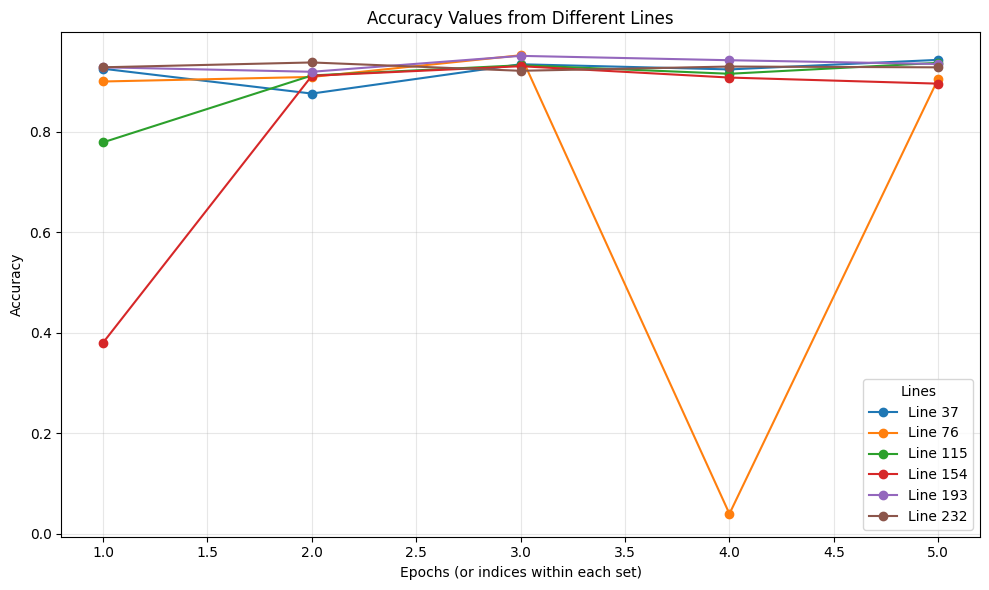

In [21]:
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from the lines
lines = [
    [0.9258179664611816, 0.8763362765312195, 0.9347209930419922, 0.9244350790977478, 0.9434680342674255],
    [0.9003887176513672, 0.9094589948654175, 0.9526200890541077, 0.039766743779182434, 0.9058880805969238],
    [0.7792354822158813, 0.9123674035072327, 0.9327771663665771, 0.9157690405845642, 0.9375556707382202],
    [0.38038548827171326, 0.9117265939712524, 0.9308333992958069, 0.9082368016242981, 0.8960881233215332],
    [0.9286524057388306, 0.9197375774383545, 0.9514052271842957, 0.9427391290664673, 0.935206949710846],
    [0.9286524057388306, 0.9382895827293396, 0.9216814041137695, 0.9301854968070984, 0.9285656213760376]
]

# Line numbers corresponding to each set of accuracies
line_numbers = [37, 76, 115, 154, 193, 232]

# Generate the chart
plt.figure(figsize=(10, 6))

# Plot each line of accuracies
for i, acc in enumerate(lines):
    plt.plot(range(1, len(acc) + 1), acc, marker='o', label=f'Line {line_numbers[i]}')

# Add labels, title, and legend
plt.xlabel('Epochs (or indices within each set)')
plt.ylabel('Accuracy')
plt.title('Accuracy Values from Different Lines')
plt.legend(title="Lines", loc='lower right')
plt.grid(alpha=0.3)
plt.tight_layout()

# Display the chart
plt.show()
